In [1]:
from heeps.util.freq_decomp import temporal
import os
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
%matplotlib inline

### Input parameters

In [2]:
os.chdir(os.path.normpath(os.path.expandvars('$HOME/heeps_metis/input_files/wavefront/point')))
band = 'L'          # band
fc1 = 0             # Hz
fc2 = 0.1           # Hz
fc3 = 1             # Hz

# 10s, 100ms

1.00 mas rms


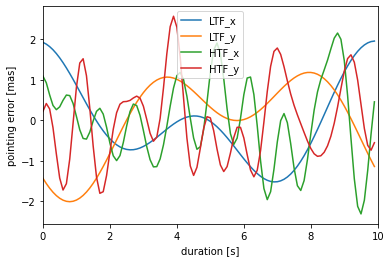

In [3]:
t_max = 10
dt = 0.1
ts = np.arange(t_max/dt)*dt
LTF_x = temporal(t_max, dt, fc1, fc2, seed=409566); plt.plot(ts, LTF_x, label='LTF_x')
LTF_y = temporal(t_max, dt, fc1, fc2, seed=224788); plt.plot(ts, LTF_y, label='LTF_y')
HTF_x = temporal(t_max, dt, fc2, fc3, seed=409566); plt.plot(ts, HTF_x, label='HTF_x')
HTF_y = temporal(t_max, dt, fc2, fc3, seed=224788); plt.plot(ts, HTF_y, label='HTF_y')
plt.legend()
plt.xlim(0, 10)
plt.xlabel('duration [s]')
plt.ylabel('pointing error [mas]')
print('%.2f mas rms'%np.std(LTF_x))

# 3600s, 300ms

1.00 mas rms


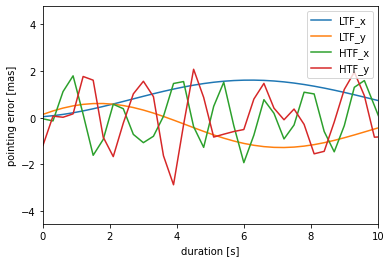

In [4]:
t_max = 3600
dt = 0.3
ts = np.arange(t_max/dt)*dt
LTF_x = temporal(t_max, dt, fc1, fc2, seed=409566); plt.plot(ts, LTF_x, label='LTF_x')
LTF_y = temporal(t_max, dt, fc1, fc2, seed=224788); plt.plot(ts, LTF_y, label='LTF_y')
HTF_x = temporal(t_max, dt, fc2, fc3, seed=409566); plt.plot(ts, HTF_x, label='HTF_x')
HTF_y = temporal(t_max, dt, fc2, fc3, seed=224788); plt.plot(ts, HTF_y, label='HTF_y')
plt.legend()
plt.xlim(0, 10)
plt.xlabel('duration [s]')
plt.ylabel('pointing error [mas]')
print('%.2f mas rms'%np.std(LTF_x))

### drift (0.4 mas rms)

In [5]:
point_QSTA = np.array([LTF_x, LTF_y]).T/np.sqrt(2)
for rms in [0.2, 0.4, 0.8, 1.6]: # quasistatic (mas rms)
    fits.writeto('point_drift_%smas_%ss_%sms_%s.fits'%(rms, t_max, round(dt*1e3), band), 
        np.float32(point_QSTA), overwrite=True)

### jitter (2 mas rms)

In [6]:
point_DYN = np.array([HTF_x, HTF_y]).T/np.sqrt(2)
for rms in [1, 2, 3, 5]: # dynamic (mas rms)
    fits.writeto('point_jitter_%smas_%ss_%sms_%s.fits'%(rms, t_max, round(dt*1e3), band), 
        np.float32(point_DYN), overwrite=True)

### drift + jitter

In [7]:
qsta_mas_rms = 0.4  # quasistatic (mas rms)
dyn_mas_rms = 2     # dynamic (mas rms)
point_ALL = point_QSTA*qsta_mas_rms + point_DYN*dyn_mas_rms
fits.writeto('point_all_%ss_%sms_%s.fits'%(t_max, round(dt*1e3), band), 
    np.float32(point_ALL), overwrite=True)
print(point_ALL.shape)

(12000, 2)


# QACITS: synthetic PSD range 0.01-0.1 Hz

(36000, 2)


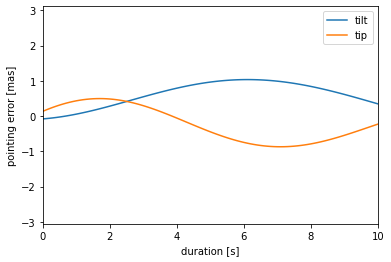

In [8]:
rms = 1             # mas rms
fc1 = 0.01          # Hz
fc2 = 0.1           # Hz
t_max = 3600        # s
dt = 0.1            # s
ts = np.arange(t_max/dt)*dt
TF_x = temporal(t_max, dt, fc1, fc2, seed=409566)
TF_y = temporal(t_max, dt, fc1, fc2, seed=224788)
point_err = rms*np.array([TF_x, TF_y]).T/np.sqrt(2)
fits.writeto('point_qacits_%smas_%s-%sHz_%ss_%sms_%s.fits'%(rms, fc1, fc2,
    t_max, round(dt*1e3), band), np.float32(point_ALL), overwrite=True)
plt.plot(ts, point_err[:,0], label='tilt')
plt.plot(ts, point_err[:,1], label='tip')
plt.legend()
plt.xlim(0, 10)
plt.xlabel('duration [s]')
plt.ylabel('pointing error [mas]')
print(point_err.shape)